# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import sys
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from citipy import citipy

#Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
#tempunits = "imperial"

# Build query URL
query_url = url + "&APPID=" + weather_api_key + "&q=" 

In [5]:
query_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a5e7321e0841144adce2b3a841fdf3ca&q='

In [6]:
response = requests.get(query_url).json()
print(json.dumps(response, indent=4))


{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [7]:
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country =[]
Date = []

# Start a counter
city_counter = 1

# Pruint the statemetn to start data acquisition
print(f"Beginning Data Acquisition")
print(f"----------------$$$$$ -------------------")

#Start looping to get each data point for each city

for mainCity in cities:
    
    #try and except methodology in order to make sure if it doesnt find a city, the code does not break
    try:
        response = requests.get(query_url+ mainCity).json()
        City.append(response["name"])
        Country.append(response["sys"]["country"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Date.append(response["dt"])
        
        
        #imput the name of the city in the print statment
        city_selected = response["name"]
        
        print(f"Processing record number {city_counter} | {city_selected}")
        
        # Increase the counter by 1 for each loop
        city_counter += 1
        
    except(KeyError, IndexError):
        print("City not found... go to the next one!!")
        
    

# Close the print statement after data is acquired
print(f" ------$$$$$$ -----")
print(f"Data acquisition finished")
        

Beginning Data Acquisition
----------------$$$$$ -------------------
Processing record number 1 | Ushuaia
Processing record number 2 | Severo-Kuril'sk
Processing record number 3 | Quelimane
Processing record number 4 | Punta Arenas
Processing record number 5 | Vaini
Processing record number 6 | Mount Gambier
Processing record number 7 | Thompson
Processing record number 8 | Karratha
Processing record number 9 | Amga
Processing record number 10 | Lompoc
Processing record number 11 | Kapaa
Processing record number 12 | Mahébourg
Processing record number 13 | Mae Chan
Processing record number 14 | Nhulunbuy
Processing record number 15 | San Miguel el Alto
Processing record number 16 | Kolosovka
Processing record number 17 | Bluff
City not found... go to the next one!!
Processing record number 18 | Torbay
Processing record number 19 | Saint George
Processing record number 20 | Saldanha
Processing record number 21 | Kangaba
Processing record number 22 | Rikitea
Processing record number 23 |

Processing record number 189 | Santa Fe
Processing record number 190 | Diu
Processing record number 191 | Atagay
Processing record number 192 | Sakakah
Processing record number 193 | Mongo
Processing record number 194 | Grand-Lahou
Processing record number 195 | Monte Alegre
Processing record number 196 | Bethel
Processing record number 197 | Hervey Bay
Processing record number 198 | Ancud
City not found... go to the next one!!
City not found... go to the next one!!
Processing record number 199 | Sivaki
City not found... go to the next one!!
Processing record number 200 | Caucayá
City not found... go to the next one!!
City not found... go to the next one!!
Processing record number 201 | Halifax
Processing record number 202 | São Filipe
Processing record number 203 | Nouadhibou
Processing record number 204 | Zhigansk
Processing record number 205 | Katangli
Processing record number 206 | Mount Isa
Processing record number 207 | Tual
Processing record number 208 | Huarmey
Processing recor

Processing record number 372 | Geraldton
Processing record number 373 | Kimbe
Processing record number 374 | Pangnirtung
Processing record number 375 | Popondetta
Processing record number 376 | Çanakkale Province
Processing record number 377 | Aksha
Processing record number 378 | Kalmunai
Processing record number 379 | Tezu
Processing record number 380 | Dzaoudzi
Processing record number 381 | Wote
Processing record number 382 | Longyearbyen
Processing record number 383 | Boca del Monte
City not found... go to the next one!!
Processing record number 384 | Luba
Processing record number 385 | Yeruham
Processing record number 386 | Mīzan Teferī
Processing record number 387 | Laguna
Processing record number 388 | Pingliang
Processing record number 389 | Yeppoon
Processing record number 390 | Kangaatsiaq
Processing record number 391 | Kabompo
Processing record number 392 | Klyuchi
Processing record number 393 | Semporna
Processing record number 394 | Yar-Sale
Processing record number 395 | 

In [8]:
city_info = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date}
city_info_df = pd.DataFrame(city_info)
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,59.00,51,75,19.46,AR,1604273163
1,Severo-Kuril'sk,50.68,156.12,42.73,71,1,8.97,RU,1604273015
2,Quelimane,-17.88,36.89,71.60,94,20,2.04,MZ,1604273164
3,Punta Arenas,-53.15,-70.92,53.60,76,0,8.05,CL,1604273164
4,Vaini,-21.20,-175.20,78.80,78,75,10.29,TO,1604273164
...,...,...,...,...,...,...,...,...,...
540,Karasjok,69.47,25.51,41.00,86,100,44.96,NO,1604273326
541,Bhātāpāra,21.73,81.93,67.50,49,0,5.19,IN,1604273326
542,Ulety,51.36,112.48,14.76,90,78,7.56,RU,1604273327
543,Mbale,1.08,34.17,66.61,73,53,1.72,UG,1604273327


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_info_df.to_csv(r'../output_data/cities.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
HHumidity = city_info_df.loc[city_info_df["Humidity"] > 100, :]
HHumidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

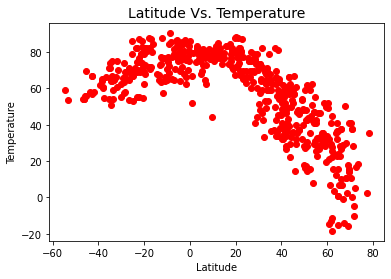

In [13]:
plt.scatter(city_info_df['Lat'], city_info_df['Max Temp'], marker="o", facecolors='red')
plt.title('Latitude Vs. Temperature',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Temperature',fontsize =10)
plt.savefig(r'../output_data/LatVsTemp.png')

## Latitude vs. Humidity Plot

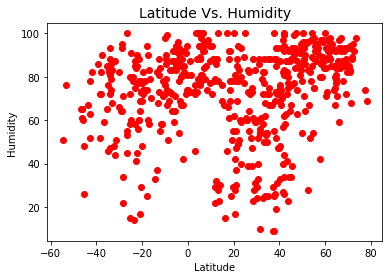

In [14]:
plt.scatter(city_info_df['Lat'], city_info_df['Humidity'], marker="o", facecolors='red')
plt.title('Latitude Vs. Humidity',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity',fontsize =10)
plt.savefig(r'../output_data/LatVsHumidity.png')

## Latitude vs. Cloudiness Plot

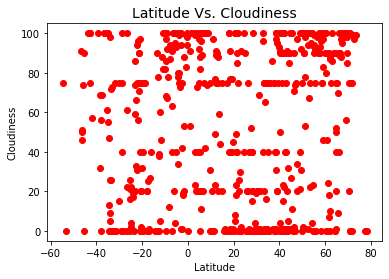

In [15]:
plt.scatter(city_info_df['Lat'], city_info_df['Cloudiness'], marker="o", facecolors='red')
plt.title('Latitude Vs. Cloudiness',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness',fontsize =10)
plt.savefig(r'../output_data/LatVsCloudiness.png')

## Latitude vs. Wind Speed Plot

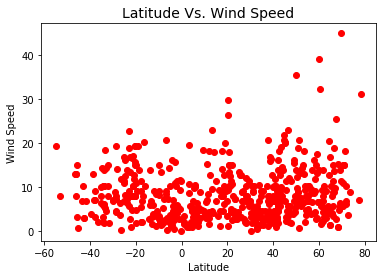

In [16]:
plt.scatter(city_info_df['Lat'], city_info_df['Wind Speed'], marker="o", facecolors='red')
plt.title('Latitude Vs. Wind Speed',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed',fontsize =10)
plt.savefig(r'../output_data/LatVsWindSpeed.png')

## Linear Regression

In [17]:
N_Hem = city_info_df.loc[city_info_df['Lat'] >= 0,:]
S_Hem = city_info_df.loc[city_info_df['Lat'] < 0,:]
N_Hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Severo-Kuril'sk,50.68,156.12,42.73,71,1,8.97,RU,1604273015
6,Thompson,55.74,-97.86,23.00,92,75,6.93,CA,1604273165
8,Amga,60.90,131.96,-14.49,88,46,1.59,RU,1604273165
9,Lompoc,34.64,-120.46,78.80,50,1,8.05,US,1604272908
10,Kapaa,22.08,-159.32,82.40,78,75,14.99,US,1604273166
...,...,...,...,...,...,...,...,...,...
540,Karasjok,69.47,25.51,41.00,86,100,44.96,NO,1604273326
541,Bhātāpāra,21.73,81.93,67.50,49,0,5.19,IN,1604273326
542,Ulety,51.36,112.48,14.76,90,78,7.56,RU,1604273327
543,Mbale,1.08,34.17,66.61,73,53,1.72,UG,1604273327


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

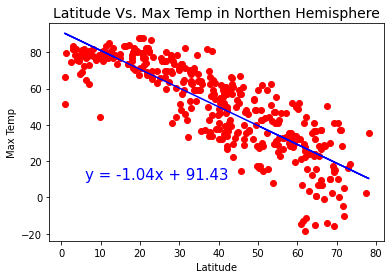

In [18]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Max Temp']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Max Temp in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temp',fontsize =10)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.savefig(r'../output_data/LatVsmaxtempNorthRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

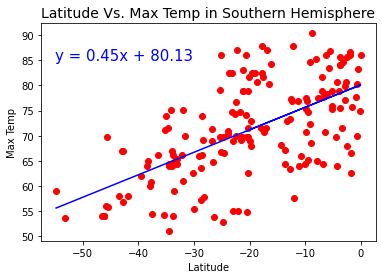

In [19]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Max Temp']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values, color='blue')
plt.title('Latitude Vs. Max Temp in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temp',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,85),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsmaxtempSouthRegression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

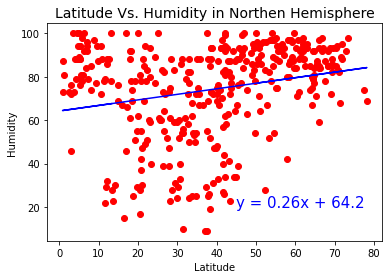

In [20]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Humidity']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Humidity in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,20),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsHumidityNorthRegression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

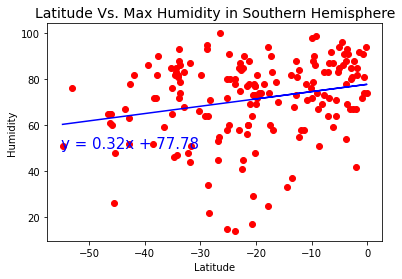

In [21]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Humidity']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values,color='blue')
plt.title('Latitude Vs. Max Humidity in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsHumiditySouthRegression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

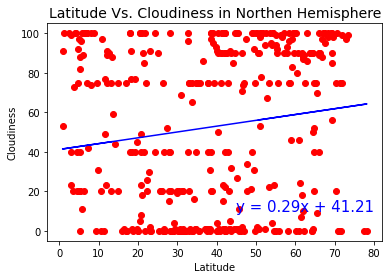

In [22]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Cloudiness']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Cloudiness in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsCloudinessNorthRegression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

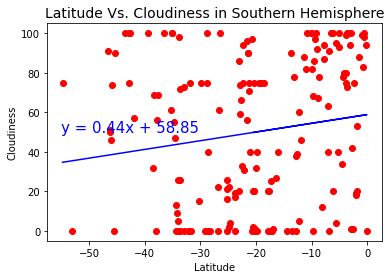

In [23]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Cloudiness']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values, color='blue')
plt.title('Latitude Vs. Cloudiness in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsCloudinessSouthRegression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

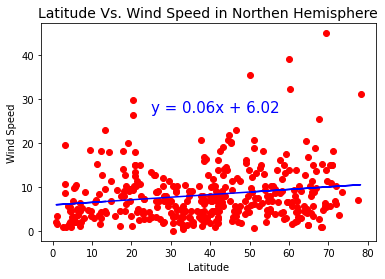

In [24]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Wind Speed']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Wind Speed in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(25,27),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsWindSpeedNorthRegression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

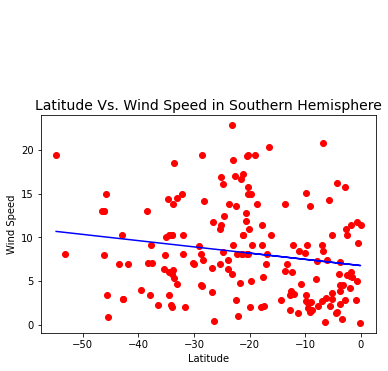

In [25]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Wind Speed']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values, color='blue')
plt.title('Latitude Vs. Wind Speed in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,35),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVswindspeedSouthRegression.png')